<a href="https://colab.research.google.com/github/MarcosCarreira/UZStats/blob/master/CME_Tick_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Robert and Rosenbaum Uncertainty Zones model

# An application to FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Jul-2019

## Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', 50)

In [0]:
pd.set_option('display.max_rows', 200)

In [0]:
import glob

## File paths

In [0]:
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [0]:
URL_EUR_1 = 'EUR/prior/'

In [0]:
PATH_EUR_PRIOR = URL_ROOT+URL_EUR_1

In [0]:
EUR_PRIOR_CDATES =pd.DataFrame(
 [['6EU5', '20150615'],
 ['6EU5', '20150616'],
 ['6EU5', '20150617'],
 ['6EU5', '20150618'],
 ['6EU5', '20150619'],
 ['6EU5', '20150622'],
 ['6EU5', '20150623'],
 ['6EU5', '20150624'],
 ['6EU5', '20150625'],
 ['6EU5', '20150626'],
 ['6EU5', '20150629'],
 ['6EU5', '20150630'],
 ['6EU5', '20150701'],
 ['6EU5', '20150702'],
 ['6EU5', '20150703'],
 ['6EU5', '20150706'],
 ['6EU5', '20150707'],
 ['6EU5', '20150708'],
 ['6EU5', '20150709'],
 ['6EU5', '20150710'],
 ['6EU5', '20150713'],
 ['6EU5', '20150714'],
 ['6EU5', '20150715'],
 ['6EU5', '20150716'],
 ['6EU5', '20150717'],
 ['6EU5', '20150720'],
 ['6EU5', '20150721'],
 ['6EU5', '20150722'],
 ['6EU5', '20150723'],
 ['6EU5', '20150724'],
 ['6EU5', '20150727'],
 ['6EU5', '20150728'],
 ['6EU5', '20150729'],
 ['6EU5', '20150730'],
 ['6EU5', '20150731'],
 ['6EU5', '20150803'],
 ['6EU5', '20150804'],
 ['6EU5', '20150805'],
 ['6EU5', '20150806'],
 ['6EU5', '20150807'],
 ['6EU5', '20150810'],
 ['6EU5', '20150811'],
 ['6EU5', '20150812'],
 ['6EU5', '20150813'],
 ['6EU5', '20150814'],
 ['6EU5', '20150817'],
 ['6EU5', '20150818'],
 ['6EU5', '20150819'],
 ['6EU5', '20150820'],
 ['6EU5', '20150821'],
 ['6EU5', '20150824'],
 ['6EU5', '20150825'],
 ['6EU5', '20150826'],
 ['6EU5', '20150827'],
 ['6EU5', '20150828'],
 ['6EU5', '20150831'],
 ['6EU5', '20150901'],
 ['6EU5', '20150902'],
 ['6EU5', '20150903'],
 ['6EU5', '20150904'],
 ['6EU5', '20150907'],
 ['6EU5', '20150908'],
 ['6EU5', '20150909'],
 ['6EU5', '20150910'],
 ['6EU5', '20150911'],
 ['6EZ5', '20150914'],
 ['6EZ5', '20150915'],
 ['6EZ5', '20150916'],
 ['6EZ5', '20150917'],
 ['6EZ5', '20150918'],
 ['6EZ5', '20150921'],
 ['6EZ5', '20150922'],
 ['6EZ5', '20150923'],
 ['6EZ5', '20150924'],
 ['6EZ5', '20150925'],
 ['6EZ5', '20150928'],
 ['6EZ5', '20150929'],
 ['6EZ5', '20150930'],
 ['6EZ5', '20151001'],
 ['6EZ5', '20151002'],
 ['6EZ5', '20151005'],
 ['6EZ5', '20151006'],
 ['6EZ5', '20151007'],
 ['6EZ5', '20151008'],
 ['6EZ5', '20151009'],
 ['6EZ5', '20151012'],
 ['6EZ5', '20151013'],
 ['6EZ5', '20151014'],
 ['6EZ5', '20151015'],
 ['6EZ5', '20151016'],
 ['6EZ5', '20151019'],
 ['6EZ5', '20151020'],
 ['6EZ5', '20151021'],
 ['6EZ5', '20151022'],
 ['6EZ5', '20151023'],
 ['6EZ5', '20151026'],
 ['6EZ5', '20151027'],
 ['6EZ5', '20151028'],
 ['6EZ5', '20151029'],
 ['6EZ5', '20151030'],
 ['6EZ5', '20151102'],
 ['6EZ5', '20151103'],
 ['6EZ5', '20151104'],
 ['6EZ5', '20151105'],
 ['6EZ5', '20151106'],
 ['6EZ5', '20151109'],
 ['6EZ5', '20151110'],
 ['6EZ5', '20151111'],
 ['6EZ5', '20151112'],
 ['6EZ5', '20151113'],
 ['6EZ5', '20151116'],
 ['6EZ5', '20151117'],
 ['6EZ5', '20151118'],
 ['6EZ5', '20151119'],
 ['6EZ5', '20151120'],
 ['6EZ5', '20151123'],
 ['6EZ5', '20151124'],
 ['6EZ5', '20151125'],
 ['6EZ5', '20151126'],
 ['6EZ5', '20151127'],
 ['6EZ5', '20151130'],
 ['6EZ5', '20151201'],
 ['6EZ5', '20151202'],
 ['6EZ5', '20151203'],
 ['6EZ5', '20151204'],
 ['6EZ5', '20151207'],
 ['6EZ5', '20151208'],
 ['6EZ5', '20151209'],
 ['6EZ5', '20151210'],
 ['6EZ5', '20151211'],
 ['x6EH6', '20151214'],
 ['x6EH6', '20151215'],
 ['x6EH6', '20151216'],
 ['x6EH6', '20151217'],
 ['x6EH6', '20151218'],
 ['x6EH6', '20151221'],
 ['x6EH6', '20151222'],
 ['x6EH6', '20151223'],
 ['x6EH6', '20160104'],
 ['x6EH6', '20160105'],
 ['x6EH6', '20160106'],
 ['x6EH6', '20160107'],
 ['x6EH6', '20160108']],
    columns=['Contract','Date'])

In [0]:
EUR_PRIOR_CDATES['Status'] = 'prior'
EUR_PRIOR_CDATES['Tick'] = 1.0

In [0]:
#EUR_PRIOR_CDATES

In [0]:
FILES_EUR_PRIOR_CAticks = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_CAticks.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_COSTtrades = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_COSTtrades.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_OBstats = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_OBstats.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_OTtrans = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_OTtrans.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_RDFtrans = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_RDFtrans.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_UZstats = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_UZstats.csv' for j in range(len(EUR_PRIOR_CDATES))]

In [38]:
pd.read_csv(FILES_EUR_PRIOR_CAticks[0], index_col=0)

,Li,lamb,Co,Al,u,eta
0,1.0,0.986315,1571.0,2536.0,0.309740,0.305501
1,2.0,0.013445,9.0,47.0,-0.308511,-0.004148
2,3.0,0.000240,1.0,0.0,inf,inf


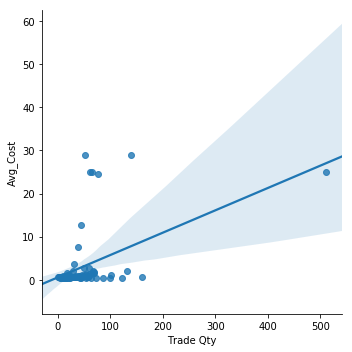

In [40]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=pd.read_csv(FILES_EUR_PRIOR_COSTtrades[0], index_col=0));

In [41]:
pd.read_csv(FILES_EUR_PRIOR_OBstats[0], index_col=0)

,ask12qty,ask12tomid,ask1qty,ask1tomid,bid12qty,bid12tomid,bid1qty,bid1tomid,twspr1,twspr2
6EU5_20150615,84.895356,1.302916,21.446649,0.540151,86.372931,1.301542,21.80074,0.540151,1.080303,3.080303


In [42]:
pd.read_csv(FILES_EUR_PRIOR_OTtrans[0], index_col=0)

,-2.0,-1.0,0.0,1.0,2.0
t,,,,,
-2.0,10620,7757,3102,630,3
-1.0,4719,116893,7593,523,2320
0.0,4732,6190,165549,5918,4594
1.0,2039,550,7815,115029,4655
2.0,2,658,2924,7988,11680


In [44]:
pd.read_csv(FILES_EUR_PRIOR_RDFtrans[0], header=[0,1], index_col=0)

side   same                   opps                 
event  DC    DT   DT+F  F     DC    DT   DT+F  F   
DC        3     5   50  4344     3     3  584   183
DT        1    25  232  3817     2     4  985  1059
DT+F      2     2   99  1449     1     4  385   396
F      2950  1739    1    16  2212  4344    2    18

In [45]:
pd.read_csv(FILES_EUR_PRIOR_UZstats[0], index_col=0)

,chgavg,dt_alt,dt_avg,dt_cont,duration,eta1,ndfpr,rvp,rvxe,spot_avg
6EU5_20150615,1.013926,6.437141,6.914228,7.697317,7.463422,0.305501,4165.0,0.005849,0.004572,11265.414786


## Run stats

In [0]:
DF_STATS_EUR = pd.DataFrame()
for j in range(len(FILES_EUR_PRIOR_OBstats)):
    new_row_1 = pd.read_csv(FILES_EUR_PRIOR_OBstats[j], index_col=0)
    new_row_2 = pd.read_csv(FILES_EUR_PRIOR_UZstats[j], index_col=0)
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_EUR = DF_STATS_EUR.append(new_row)
DF_STATS_EUR.reset_index(inplace=True, drop=True)
DF_STATS_EUR['Contract'] = EUR_PRIOR_CDATES['Contract']
DF_STATS_EUR['Dates'] = pd.to_datetime(EUR_PRIOR_CDATES['Date'], format='%Y%m%d')
DF_STATS_EUR['Tick'] = EUR_PRIOR_CDATES['Tick']
DF_STATS_EUR['Status'] = EUR_PRIOR_CDATES['Status']
DF_STATS_EUR.set_index(['Dates'], inplace=True)

In [83]:
DF_STATS_EUR.head()

,ask12qty,ask12tomid,ask1qty,ask1tomid,bid12qty,bid12tomid,bid1qty,bid1tomid,twspr1,twspr2,chgavg,dt_alt,dt_avg,dt_cont,duration,eta1,ndfpr,rvp,rvxe,spot_avg,Contract,Tick,Status
Dates,,,,,,,,,,,,,,,,,,,,,,,
2015-06-15,84.895356,1.302916,21.446649,0.540151,86.372931,1.301542,21.800740,0.540151,1.080303,3.080303,1.013926,6.437141,6.914228,7.697317,7.463422,0.305501,4165.0,0.005849,0.004572,11265.414786,6EU5,1.0,prior
2015-06-16,104.524580,1.433306,26.959599,0.704683,100.018134,1.453215,25.305117,0.704683,1.409366,3.409399,1.004864,9.827628,11.671624,15.042785,12.934252,0.274686,2467.0,0.004449,0.003298,11249.240681,6EU5,1.0,prior
2015-06-17,91.924172,1.436725,23.499954,0.679752,94.414306,1.420455,24.159480,0.679752,1.359505,3.360043,1.071401,2.634866,2.752637,2.937431,2.287043,0.311061,10462.0,0.010530,0.008306,11303.325146,6EU5,1.0,prior
2015-06-18,82.989397,1.350425,20.797045,0.630599,90.809792,1.347677,24.467065,0.630599,1.261199,3.347028,1.022165,4.115989,4.659191,5.627517,4.795632,0.281467,6181.0,0.007208,0.005408,11402.745875,6EU5,1.0,prior
2015-06-19,111.054435,1.306565,26.601901,0.529959,109.591411,1.306342,25.871195,0.529959,1.059919,3.060076,1.011976,9.385253,10.143702,11.629115,10.986831,0.256183,2839.0,0.004783,0.003423,11354.491901,6EU5,1.0,prior


In [0]:
DF_STATS_EUR_NI = DF_STATS_EUR.reset_index()

## Dataframe of price changes by k

In [0]:
DF_STATS_EUR_MOVES = pd.DataFrame()
for j in range(len(FILES_EUR_PRIOR_CAticks)):
    new_row = pd.read_csv(FILES_EUR_PRIOR_CAticks[j], index_col=0)
    new_row['Dates'] = pd.to_datetime(EUR_PRIOR_CDATES['Date'].iloc[j], format='%Y%m%d')
    new_row['Tick'] = EUR_PRIOR_CDATES['Tick'].iloc[j]
    new_row['Status'] = EUR_PRIOR_CDATES['Status'].iloc[j]
    new_row['Contract'] = EUR_PRIOR_CDATES['Contract'].iloc[j]
    DF_STATS_EUR_MOVES = DF_STATS_EUR_MOVES.append(new_row)
DF_STATS_EUR_MOVES.set_index(['Dates', 'Status'], inplace=True)

In [124]:
DF_STATS_EUR_MOVES.head()

Li      lamb      Co      Al         u       eta  Tick  \
Dates      Status                                                            
2015-06-15 prior   1.0  0.986315  1571.0  2536.0  0.309740  0.305501   1.0   
           prior   2.0  0.013445     9.0    47.0 -0.308511 -0.004148   1.0   
           prior   3.0  0.000240     1.0     0.0       inf       inf   1.0   
2015-06-16 prior   1.0  0.995541   873.0  1582.0  0.275917  0.274686   1.0   
           prior   2.0  0.004054     0.0    10.0 -0.500000 -0.002027   1.0   

                  Contract  
Dates      Status           
2015-06-15 prior      6EU5  
           prior      6EU5  
           prior      6EU5  
2015-06-16 prior      6EU5  
           prior      6EU5

In [0]:
def get_moves_mat(data_frame, date):
    mat_values = data_frame.copy().loc[date].values
    mat_df = pd.DataFrame(mat_values,\
        columns=['Move in ticks', 'lambda',\
            'Continuations', 'Alternations', 'u', 'eta',\
            'Tick Value', 'Contract'])
    return mat_df

In [0]:
def get_lambda1_mat():
    sub_mat = DF_STATS_MOVES.copy().reset_index()
    sub_mat = sub_mat[sub_mat['Li']==1]\
        [['Product', 'Contract', 'Dates', 'lamb']]
    return sub_mat

In [0]:
SIZES_MOVES_EUR = pd.DataFrame([[date, len(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))), max(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))['Move in ticks'])] for date in\
      pd.to_datetime(EUR_PRIOR_CDATES['Date'], format='%Y%m%d')],\
    columns=['Dates', 'Sizes', 'Max move'])
SIZES_MOVES_EUR.set_index(['Dates'], inplace=True)

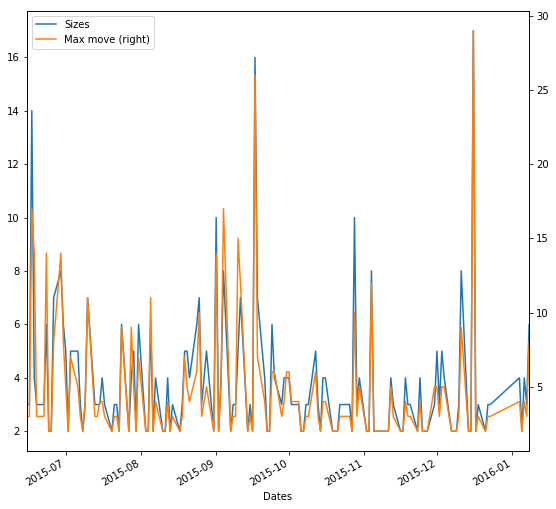

In [128]:
SIZES_MOVES_EUR.plot(secondary_y='Max move', figsize=(9,9));

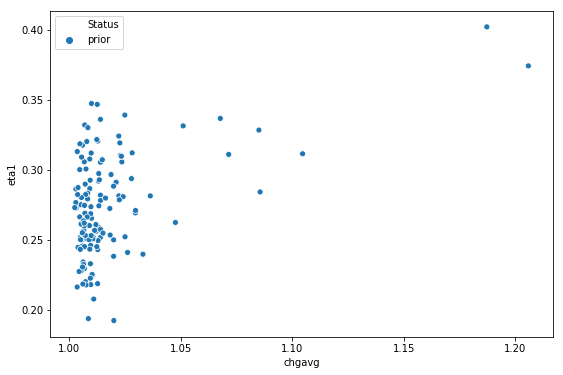

In [91]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='chgavg', y='eta1', hue='Status',\
            data=DF_STATS_EUR);

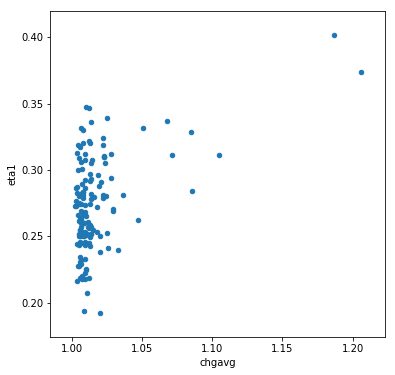

In [85]:
DF_STATS_EUR.plot.scatter(x='chgavg', y='eta1', figsize=(6,6));

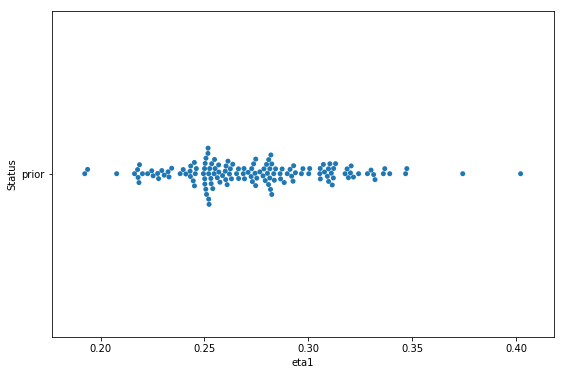

In [90]:
plt.figure(figsize=(9,6))
sns.swarmplot(x='eta1', y='Status',\
            data=DF_STATS_EUR);

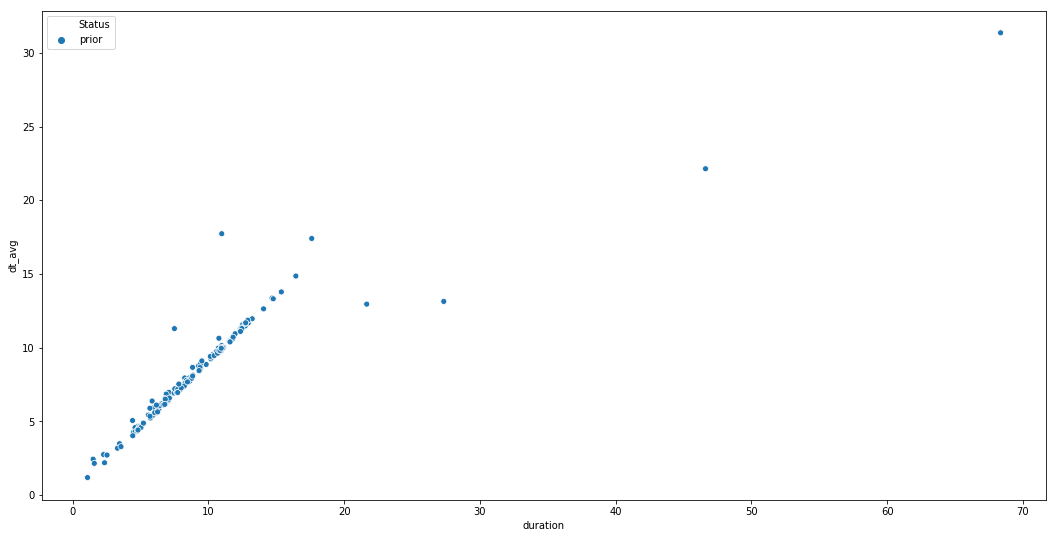

In [88]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='duration', y='dt_avg', hue='Status',\
            data=DF_STATS_EUR);

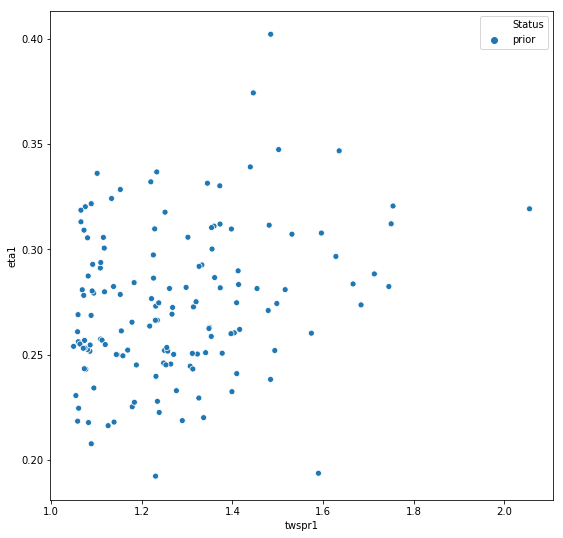

In [92]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='twspr1', y='eta1', hue='Status',\
            data=DF_STATS_EUR);

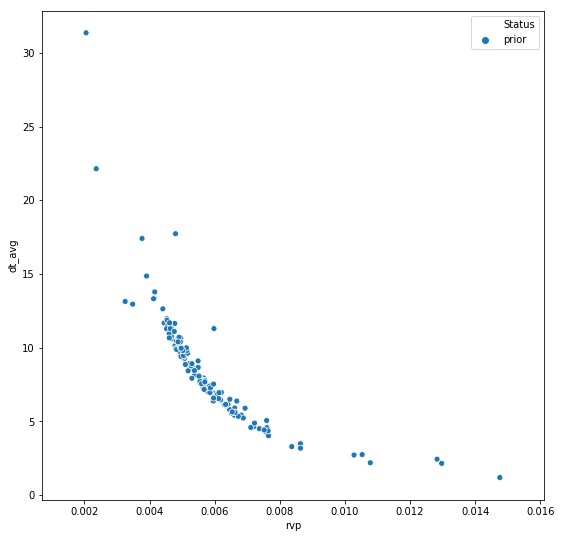

In [93]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='rvp', y='dt_avg', hue='Status',\
            data=DF_STATS_EUR);

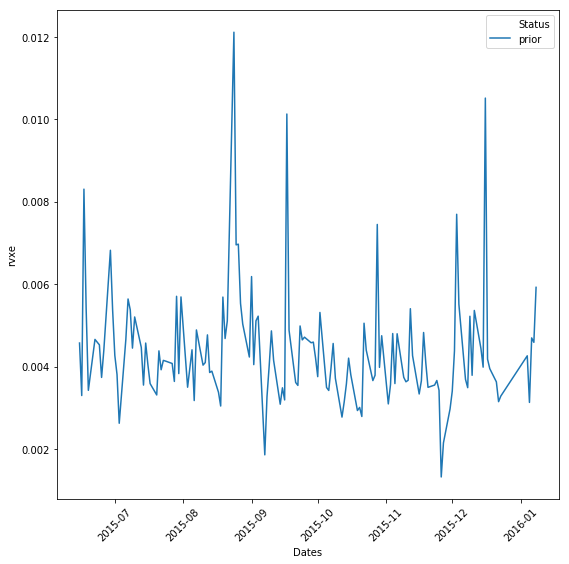

In [108]:
plt.figure(figsize=(9,9))
sns.lineplot(x='Dates', y='rvxe', hue='Status', data=DF_STATS_EUR_NI);
plt.xticks(rotation=45);

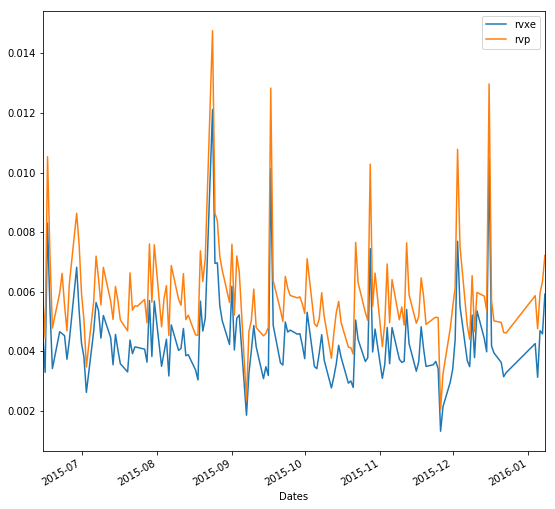

In [110]:
DF_STATS_EUR[['rvxe','rvp']].plot(figsize=(9,9));

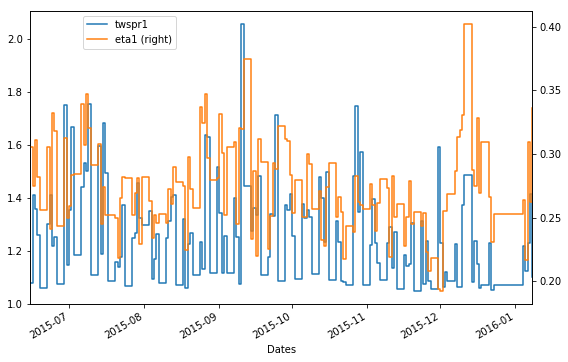

In [96]:
ax = DF_STATS_EUR[['twspr1','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

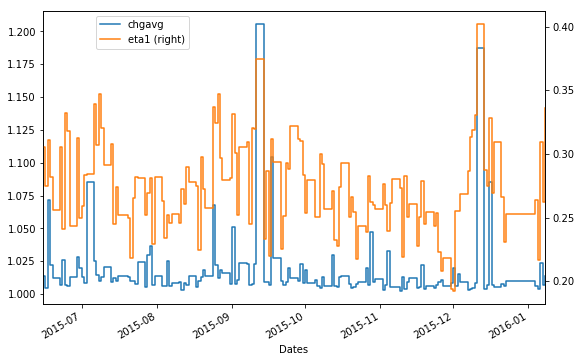

In [97]:
ax = DF_STATS_EUR[['chgavg','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

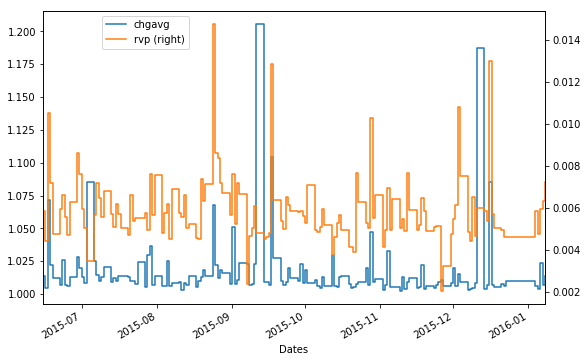

In [98]:
ax = DF_STATS_EUR[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

In [0]:
# DF_STATS_EUR_COST = pd.DataFrame()
# for j in range(len(FILES_EUR_BEFORE_COSTtrades)):
#     new_row = pd.read_hdf(FILES_EUR_BEFORE_COSTtrades[j])
#     new_row['Date'] = DATES_BEFORE_EUR[j].strftime('%Y-%m-%d')
#     DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
# for j in range(len(FILES_EUR_AFTER_COSTtrades)):
#     new_row = pd.read_hdf(FILES_EUR_AFTER_COSTtrades[j])
#     new_row['Date'] = DATES_AFTER_EUR[j].strftime('%Y-%m-%d')
#     DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
# DF_STATS_EUR_COST.set_index('Date', inplace=True)

In [0]:
# DF_STATS_EUR_COST_NI = DF_STATS_EUR_COST.reset_index()

In [0]:
# DF_STATS_EUR_COST_2 = DF_STATS_EUR_COST.copy().loc['2015-10-01':]
# DF_STATS_EUR_COST_NI_2 = DF_STATS_EUR_COST_2.reset_index()

In [0]:
#DF_STATS_EUR_COST_2_DATES = DF_STATS_EUR_COST_2.index.unique().values

In [0]:
#sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[0]]);

In [0]:
#sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[1]]);

In [0]:
from pandas.plotting import scatter_matrix

In [100]:
DF_STATS_EUR.columns

Index(['ask12qty', 'ask12tomid', 'ask1qty', 'ask1tomid', 'bid12qty',
       'bid12tomid', 'bid1qty', 'bid1tomid', 'twspr1', 'twspr2', 'chgavg',
       'dt_alt', 'dt_avg', 'dt_cont', 'duration', 'eta1', 'ndfpr', 'rvp',
       'rvxe', 'spot_avg', 'Contract', 'Tick', 'Status'],
      dtype='object')

In [0]:
SUB_DF_STATS_EUR = DF_STATS_EUR[['twspr1', 'chgavg', 'dt_avg', 'eta1', 'ndfpr', 'rvp']]

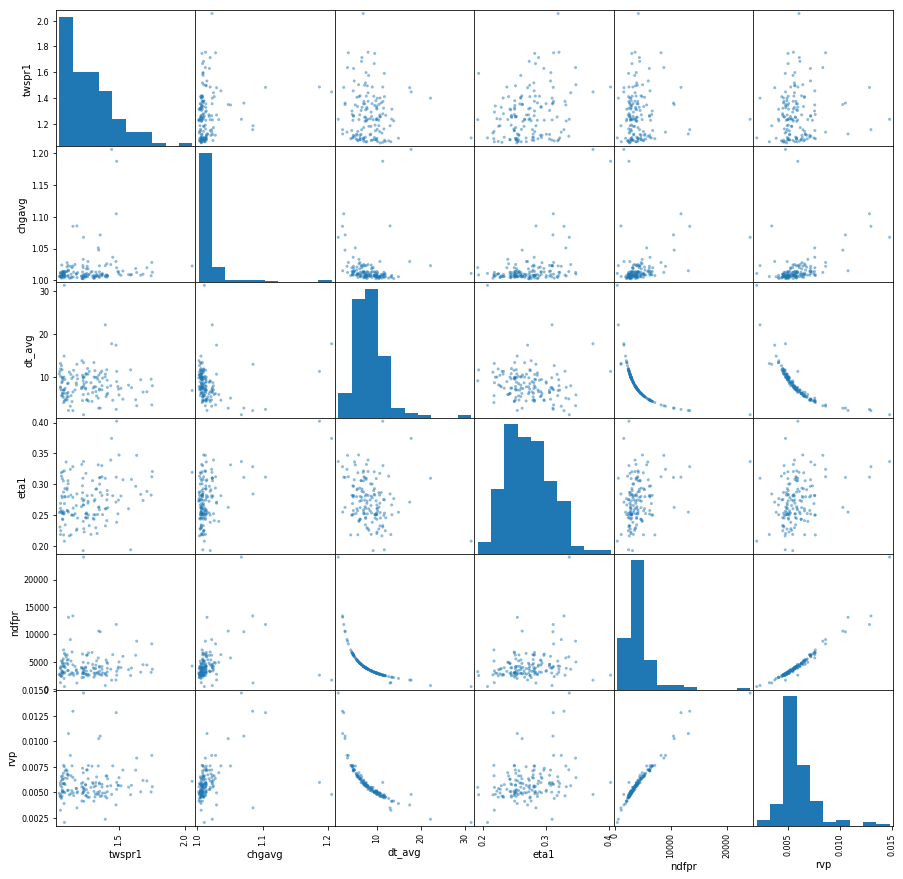

In [104]:
scatter_matrix(SUB_DF_STATS_EUR, figsize=(15, 15));